# Load modules and import dataset from features selection notebook


In [9]:
# utility
import numpy as np
# plot
import matplotlib.pyplot as plt
# sklearn
import pandas
from scipy.io import arff
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

%store -r data

# Decision trees
Applicazione dei decision tree al dataset

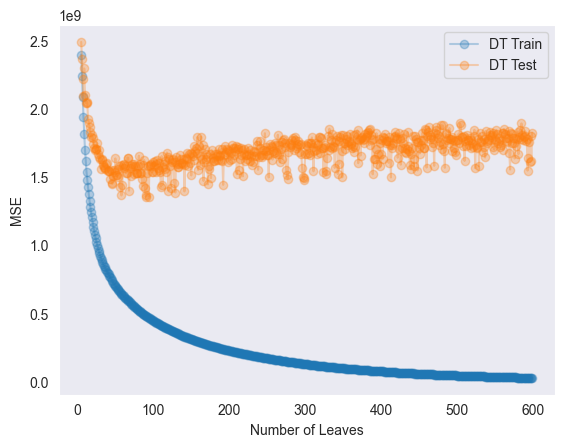

In [10]:
dataset = arff.loadarff('./ames_housing.arff')
data = pandas.DataFrame(dataset[0])

X = data._get_numeric_data()
X = X.loc[:, ~X.columns.isin(
    ['Sale_Price', 'Longitude', 'Latitude', 'TotRms_AbvGrd'])]
X = X.loc[:, ~X.columns.isin(
    [col for col in X if len(X[col].value_counts()) < 13])]

y = data['Sale_Price']

# split dataset in train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

errors = []

for max_leaves in range(5, 600):
    # train and predict
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train, y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(X_test))

    errors += [[max_leaves, train_acc, test_acc]]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:, 0], errors[:, 1], "o-", label="DT Train", alpha=0.3)
ax.plot(errors[:, 0], errors[:, 2], "o-", label="DT Test", alpha=0.3)
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();

# Comparazione con regressione lineare

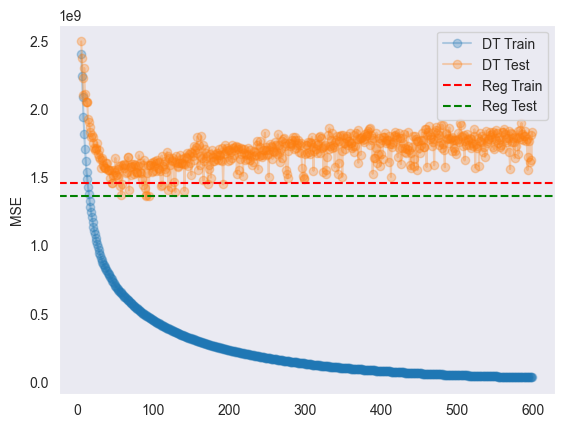

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_train_err = mean_squared_error(y_true=y_train, y_pred=reg.predict(X_train))
reg_test_err = mean_squared_error(y_true=y_test, y_pred=reg.predict(X_test))

fig, ax = plt.subplots()
ax.plot(errors[:, 0], errors[:, 1], "o-", label="DT Train", alpha=0.3)
ax.plot(errors[:, 0], errors[:, 2], "o-", label="DT Test", alpha=0.3)

ax.axhline(y=reg_train_err, c='red', ls="--", label="Reg Train")
ax.axhline(y=reg_test_err, c='green', ls="--", label="Reg Test")

ax.set_ylabel("MSE")
ax.grid()
ax.legend();

# Comparazione con KNeighborsRegressor

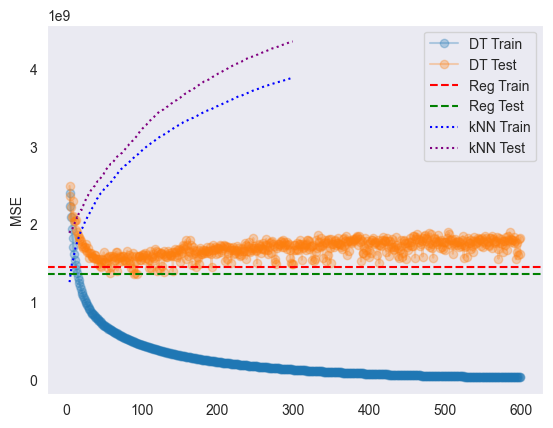

In [12]:
errors_knn = []
for k in range(5, 300):
    kNN = KNeighborsRegressor(n_neighbors=k)
    kNN.fit(X_train, y_train)

    knn_train_err = mean_squared_error(
        y_true=y_train, y_pred=kNN.predict(X_train))
    knn_test_err = mean_squared_error(
        y_true=y_test, y_pred=kNN.predict(X_test))

    errors_knn += [[k, knn_train_err, knn_test_err]]

errors_knn = np.array(errors_knn)

fig, ax = plt.subplots()
ax.plot(errors[:, 0], errors[:, 1], "o-", label="DT Train", alpha=0.3)
ax.plot(errors[:, 0], errors[:, 2], "o-", label="DT Test", alpha=0.3)

ax.axhline(y=reg_train_err, c='red', ls="--", label="Reg Train")
ax.axhline(y=reg_test_err, c='green', ls="--", label="Reg Test")

ax.plot(errors_knn[:, 0], errors_knn[:, 1], c='blue', ls="dotted", label="kNN Train")
ax.plot(errors_knn[:, 0], errors_knn[:, 2], c='purple', ls="dotted", label="kNN Test")

ax.set_ylabel("MSE")
ax.grid()
ax.legend()